#### Flight Price Prediction
#### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### Size of training set: 10683 records

#### Size of test set: 2671 records
#### FEATURES:

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

 



In [3]:
# Impoting necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.preprocessing import PowerTransformer


#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [325]:
path="C:\\Users\HP\Downloads\Data_Train.xlsx"
train=pd.read_excel(path)
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


- In this train dataset depending upon several independent features we need to predict the Price of flight tickets. 
- The train dataset is having 11 columns out of which 10 columns are the feature data and 1 column is the label variable. 
- Now we can see this dataset is having mainly nominal data and categorical data and only the label data is a continuous one, that means it is a regression type of problem. 

In [326]:
path="C:\\Users\HP\Downloads\Test_set.xlsx"
test=pd.read_excel(path)
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


- This test dataset is having 10 independent features.
- Like we have seen that test dataset is also having the same features except the dependent variable. 
- As the label column is missing, we will use this dataset after model training for testing purpose.

In [327]:
train.shape

(10683, 11)

- train dataset is containing 10683 rows and 11 columns.

In [328]:
test.shape

(2671, 10)

- test dataset is containing 2671 rows and 10 columns.

In [329]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

- train dataset is containing 11 columns out of which 10 columns are the independent variables and 1 column is the dependent variable. 

In [330]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

- test dataset is containing 10 columns and these columns are the independent variables and the label data is missing here, hence we can use this dataset after model creation using train dataset for prediction purpose.

In [331]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

- All the features are containing categorical or noninal data and only the Label is having numerical data.

In [332]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

- All the features are containing categorical or noninal data.

In [333]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

- Different columns are containing different counts of categories like, Airline column is having 12 categories,means there are 12 different types of airlines present. 
- The label is containing 1870 price ranges and we have 10683 rows, it means airlines are having flights with same price ranges tickets also.

In [334]:
test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

- In test dataset different columns are containing different counts of categories like, Airline column is having 11 categories and so on.

In [335]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- There are 2 missing values present in the train dataset, one is in Route column and other is in Total stops column . 
- And all the features are containing object type of data. Only the label variable is having numerical data.

In [336]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


- There is no missing value present in the dataset. All the feature data are having object type of data.

In [337]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- There are 2 missing values present in the train dataset,one is in Route column and other is in Total stops column that we need to take care.
- We are going to drop those two data as it does not make much difference for this big dataset.

In [338]:
#We are going to drop those two data as it does not make much difference for this big dataset
train.dropna(inplace=True)

In [339]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- Now we can see, there is no missing value present in the dataset.

In [340]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- Test dataset is not having any missing values.

In [341]:
train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- The label data of train dataset is containing continuous values.
- Minimum price of a flight ticket is 1759 and maximum price is 79512. That is a big gap maybe skewness is present.
- The difference of quartile 3 and maximum value is big. So, right skewness might be there.

In [342]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


- There is no missing value present in the test dataset as the count is 2671.
- Airline is having 11 categories of data out of which Jet Airways is the most preferable airline.
- Travellers mostly use jet airways to go to Cochin from Delhi(as the frequency is same) where there is only one stop.

#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous label and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:


Minimum Price:  1759
Maximum Price:  79512


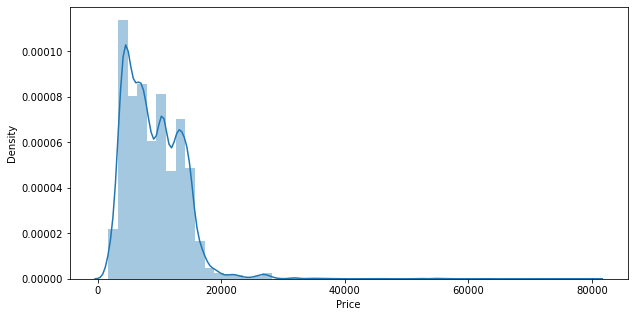

In [343]:
plt.figure(figsize=(10,5))
sns.distplot(train['Price'])
print('Minimum Price: ',train['Price'].min())
print('Maximum Price: ',train['Price'].max())

- As we have already discussed the price of a flight ticket is ranging from 1759 to 79512. The data is right skewed.

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

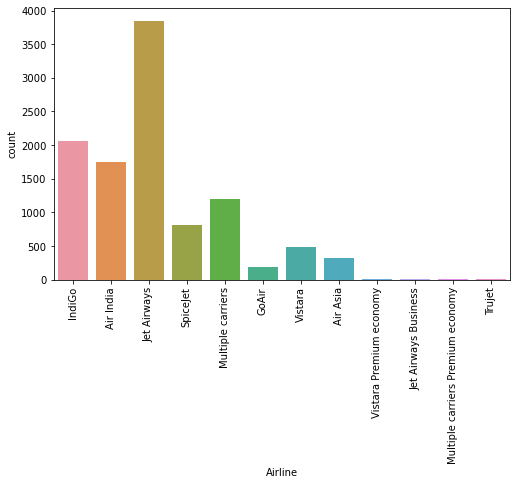

In [345]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(train['Airline'])
plt.xticks(rotation=90)
train['Airline'].value_counts()

- As we can see, In train dataset, the most preferable or highest flying airline is Jet Airways ( 3849 ) and least flying airline is Trujet ( 1 ).

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

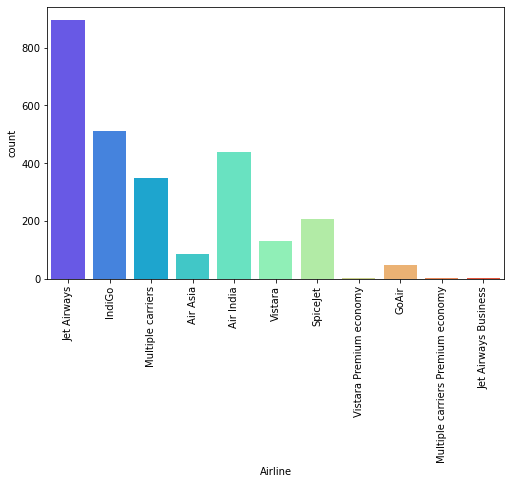

In [346]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Airline'],palette='rainbow')
plt.xticks(rotation=90)
test['Airline'].value_counts()

- As we can see, In test dataset, the most preferable or highest flying airline is Jet Airways ( 897 ) and least flying Jet Airways Business ( 2 ).

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

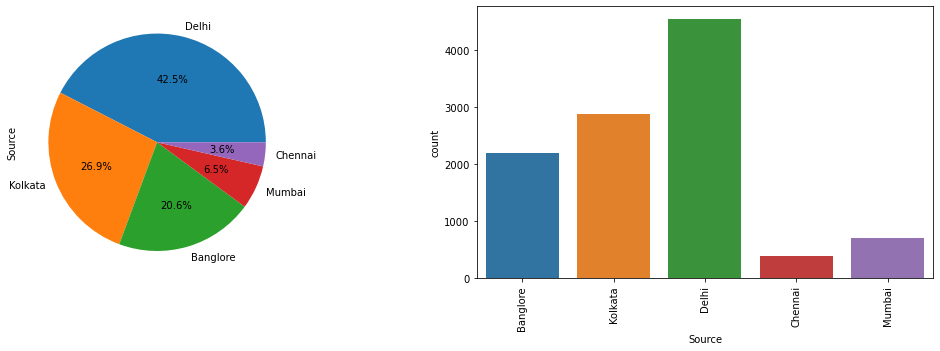

In [347]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Source'])
plt.xticks(rotation=90)
train['Source'].value_counts()

- According to train dataset 42.5% of flights start their journey mainly from Delhi ( 4536 ) then kolkata ( 2871 ) and least count of flights (3.6%) start journey from Chennai ( 381 ).

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

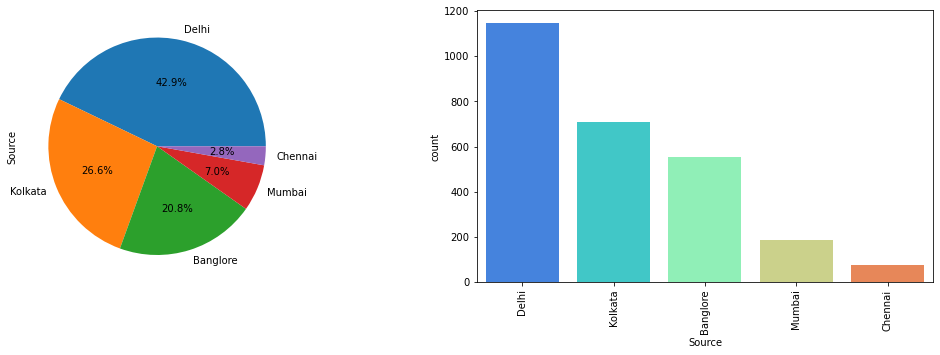

In [142]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Source'],palette='rainbow')
plt.xticks(rotation=90)
test['Source'].value_counts()

- According to test dataset 42.9% of flight start their journey mainly from Delhi ( 1145 ) then kolkata ( 710 ) and least count of flights (2.8%) start journey from Chennai ( 75 ).

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

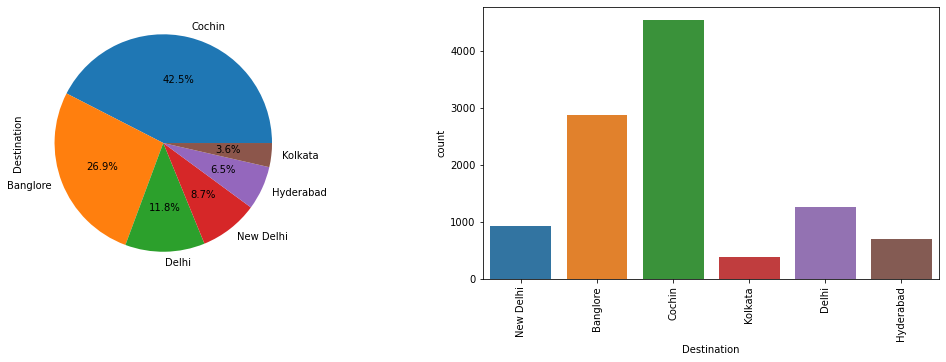

In [143]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Destination'])
plt.xticks(rotation=90)
train['Destination'].value_counts()

- According to train dataset 42.5% of flights  main destination is Cochin ( 4536 ) then Banglore ( 2871 ) and least count of flights (3.6%) travel to Kolkata ( 381 ).

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

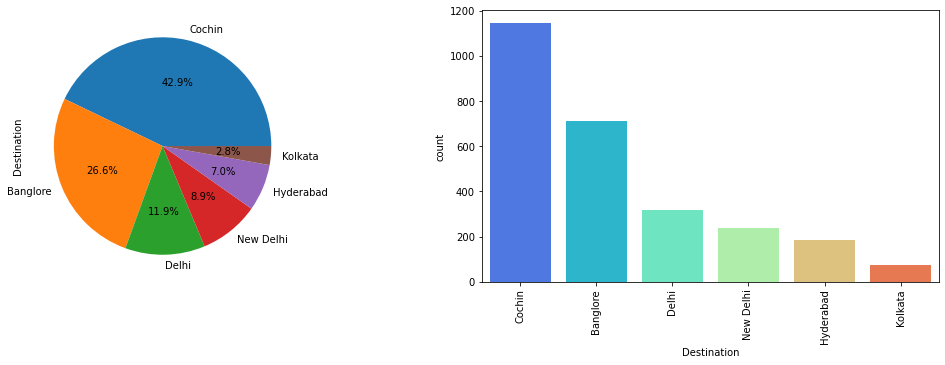

In [144]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Destination'],palette='rainbow')
plt.xticks(rotation=90)
test['Destination'].value_counts()

- According to test dataset 42.9% of flights main destination is Cochin ( 1145 ) then Banglore ( 710 ) and least count of flights (2.8%) are travelling to Kolkata ( 75 ).

In [145]:
train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → GOI → HYD             1
BOM → RPR → VTZ → HYD       1
CCU → VTZ → BLR             1
BOM → BBI → HYD             1
BOM → VNS → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

- According to train dataset most using route by a flight is DEL → BOM → COK (2376). 

In [146]:
test['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → GOI → DEL                  1
BOM → VGA → TIR → HYD            1
CCU → IXR → BBI → BLR            1
CCU → DEL → COK → TRV → BLR      1
BLR → VGA → DEL                  1
Name: Route, Length: 100, dtype: int64

- According to train dataset most using route by a flight is DEL → BOM → COK (624). 

In [148]:
train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:45      1
03:00      1
01:35      1
04:50      1
04:15      1
Name: Dep_Time, Length: 222, dtype: int64

- According to train dataset, preferred Departure time is 18:55 or 6:55 pm.

In [149]:
test['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
06:15     1
15:35     1
02:30     1
16:35     1
01:35     1
Name: Dep_Time, Length: 199, dtype: int64

- According to test dataset, preferred Departure time is 10:00 or 10 pm.

In [150]:
train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
13:55 13 Mar      1
00:25 22 Jun      1
22:05 25 May      1
18:40 02 Mar      1
00:15 28 Apr      1
Name: Arrival_Time, Length: 1343, dtype: int64

- According to train dataset, the most counts of flights arrive at 19:00 or 7pm.

In [151]:
test['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
18:15 02 Apr      1
14:25 07 Jun      1
22:40 19 May      1
04:40 25 May      1
22:35 02 Apr      1
Name: Arrival_Time, Length: 704, dtype: int64

- According to test dataset, the most counts of flights arrive at 19:00 or 7pm.

In [152]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
19h 50m      1
31h 50m      1
29h 10m      1
42h 45m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

- According to train dataset, most of the flights are mainly hovering for 2 hours 50 minutes. The frequency of hovering of a flight is less when duration is more.

In [153]:
test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
39h 5m       1
3h 45m       1
7h 25m       1
28h 55m      1
21h 5m       1
Name: Duration, Length: 320, dtype: int64

- According to test dataset, most of the flights are mainly hovering for 2 hours 50 minutes.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

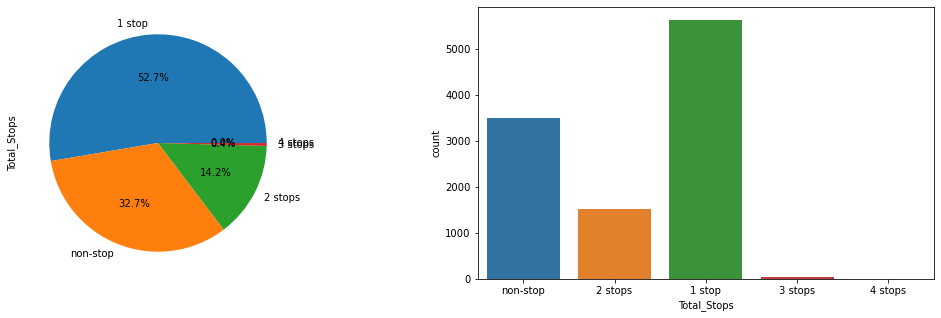

In [154]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Total_Stops'])
train['Total_Stops'].value_counts()

- According to train dataset, while travelling from one destination to another, there are some stops for the flights to refilling the fuel or depending upon the distance. There are 5 categories for that. Highest counts of flights stop for 1 stop 5625 (52.7%) and then there are non stop flights (for less distant destinations) and least count of flights stop for 4 stop only 1.

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

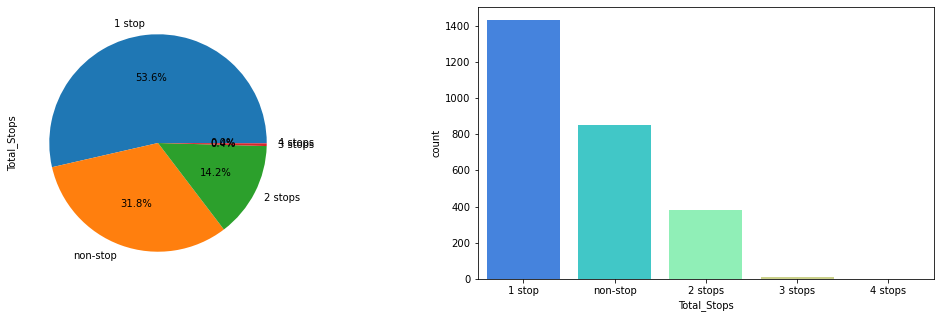

In [155]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Total_Stops'],palette='rainbow')
test['Total_Stops'].value_counts()

- According to test dataset, there are 5 categories of stops. Highest counts of flights stop for 1 stop 1431 ( 53.6% ) least count of flights stop for 4 stops only 1.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

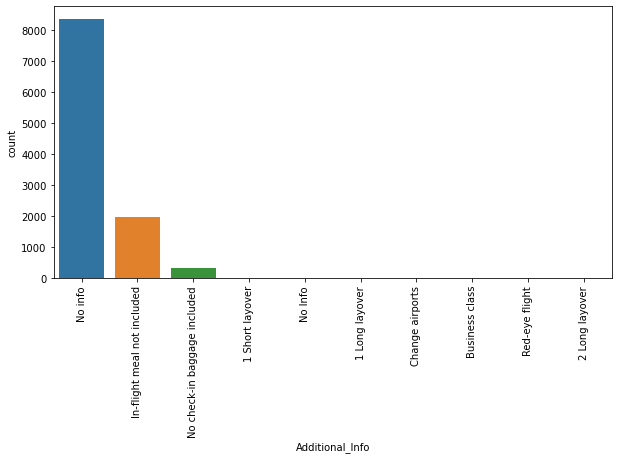

In [156]:
plt.figure(figsize=(10,5))
sns.countplot(train['Additional_Info'])
plt.xticks(rotation=90)
train['Additional_Info'].value_counts()

- According to train dataset, Mostly flights have no additional information and the count is 8344. 2 Long layover is the least additional information and it counts 2.

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

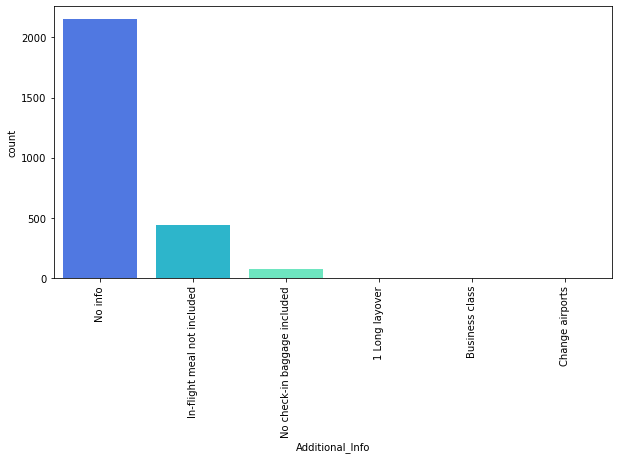

In [157]:
plt.figure(figsize=(10,5))
sns.countplot(test['Additional_Info'],palette='rainbow')
plt.xticks(rotation=90)
test['Additional_Info'].value_counts()

- According to test dataset, Mostly flights have no additional information and the count is 2148. Change airports is the least additional information and it counts only 1.

#### Bivariate Analysis:

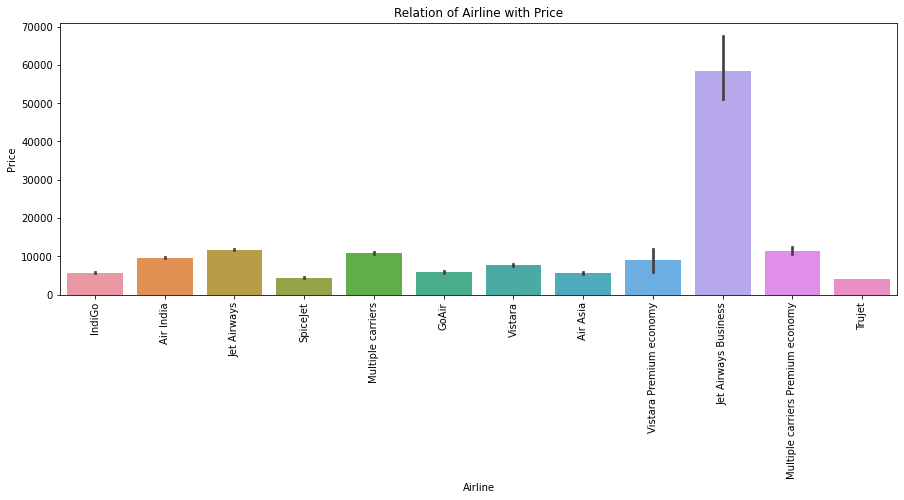

In [158]:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=train).set_title('Relation of Airline with Price')
plt.xticks(rotation=90)
plt.show()

- Jet Airways Business is the costliest of all the airlines according to train dataset. It costs 60,000 onwards. And Trujet and Spicejet are the least pricey airlines.

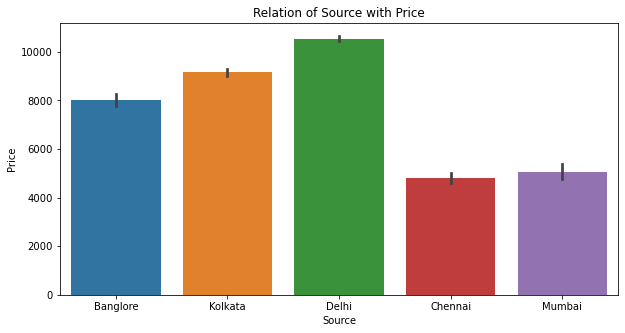

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(x='Source',y='Price',data=train).set_title('Relation of Source with Price')
plt.show()

- Flights take off from Delhi are the costliest ones. Whereas Flights take off from Chennai is more cost effective. 

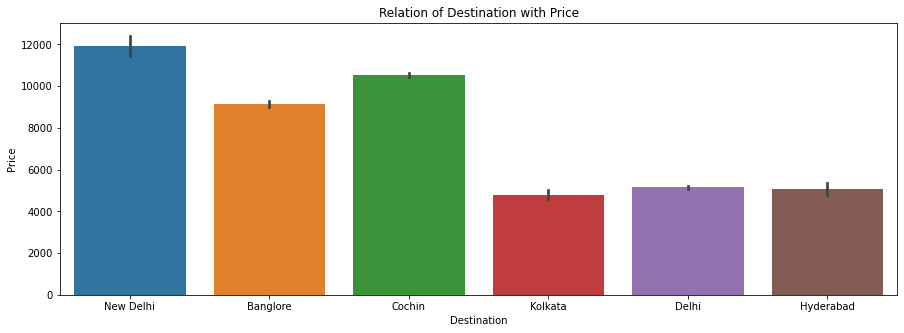

In [160]:
plt.figure(figsize=(15,5))
sns.barplot(x='Destination',y='Price',data=train).set_title('Relation of Destination with Price')
plt.show()

- Flights touch down New Delhi are the costliest ones, and 2nd costlier destination according to flight price is Cochin. Whereas Flights land to Kolkata are more cost effective. 

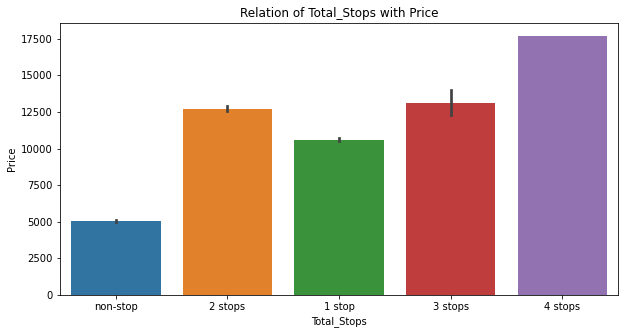

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=train).set_title('Relation of Total_Stops with Price')
plt.show()

- Flights with more stops are expensive.

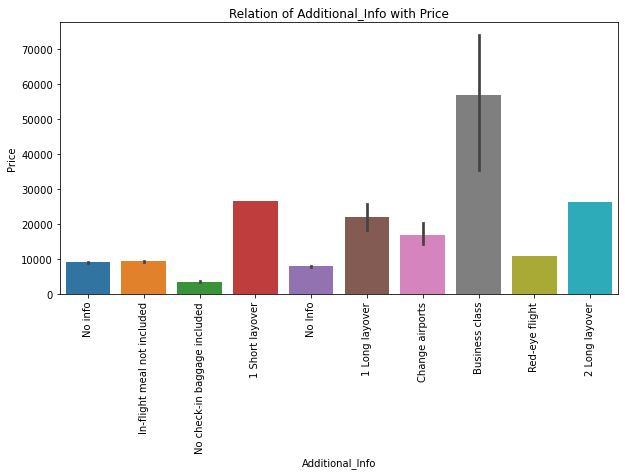

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(x='Additional_Info',y='Price',data=train).set_title('Relation of Additional_Info with Price')
plt.xticks(rotation=90)
plt.show()

- Travelling by Business class is very expensive, And No check-in baggage included flights are cost effective.

#### Multivariate Analysis:

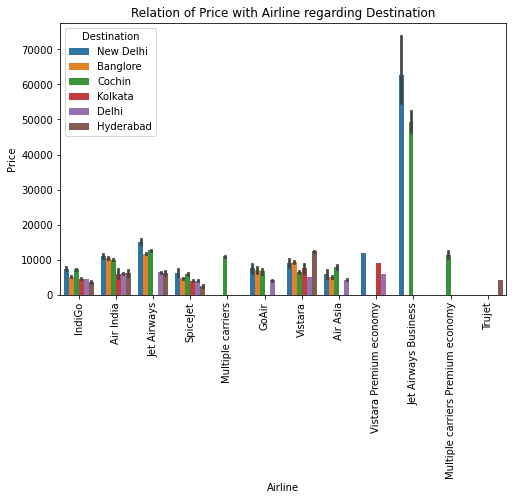

In [164]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Destination',data=train).set_title('Relation of Price with Airline regarding Destination')
plt.xticks(rotation=90)
plt.show()

- As we already have discussed, travelling to New Delhi or Cochin by Jet Airways business is the costliest.

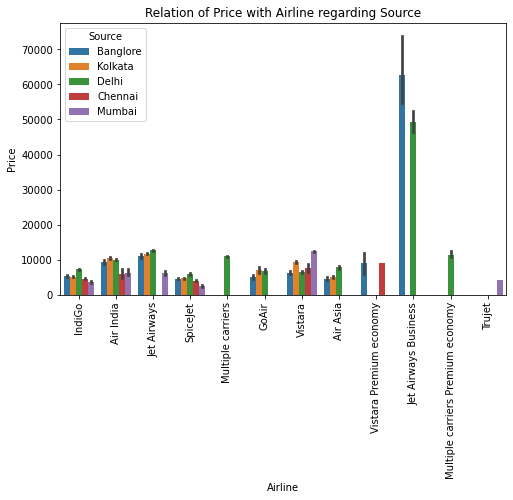

In [165]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Source',data=train).set_title('Relation of Price with Airline regarding Source')
plt.xticks(rotation=90)
plt.show()

- As we already have discussed, travelling from Delhi and Banglore by Jet Airways business is the costliest.

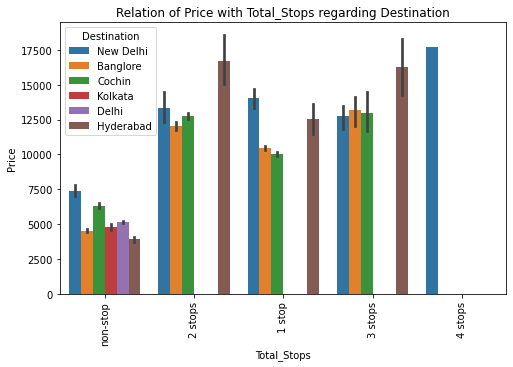

In [166]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops',y='Price',hue='Destination',data=train).set_title('Relation of Price with Total_Stops regarding Destination')
plt.xticks(rotation=90)
plt.show()

- Non stop flights are more economical than flights those halt more.

#### Data Engineering (Train data ):

For making the data more simple and understandable we need to create new columns from existing columns.

In [167]:
# As we can see most of the columns  are having nominal data
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### 1. Conversion of date_of_journey:
  
  We are using date time module to make the date of journey column more simple and useful for the model.

In [349]:
# Creating 3 different columns for day, month and year data
train['year'] = pd.DatetimeIndex(train['Date_of_Journey']).year 
train['month'] = pd.DatetimeIndex(train['Date_of_Journey']).month 
train['day'] = pd.DatetimeIndex(train['Date_of_Journey']).day

In [350]:
# As we can see now the train dataset is having 3 different column for day, month and year
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [351]:
# Now the Date_of_Journey column is not needed
train.drop(["Date_of_Journey"],axis = 1,inplace = True)

#### 2.Conversion of the Dep_time:
We are using same date time module to make the Dep_time column more simple and useful for the model.

In [352]:
# Creating 2 different columns for hour and minutes data
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [353]:
# Dropping the Dep_Time data as it's not needed
train.drop(["Dep_Time"],axis =1,inplace = True)

#### 3.Conversion of Arrival_Time:
We are using same datetime module to make the Arrival_Time column more simple and useful for the model.

In [354]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
train["Arrival_hour"]=pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [355]:
# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
train.drop(["Arrival_Time"],axis = 1,inplace=True)

#### 4. Conversion of duration:

 The Duration column is not having the time data as time or date data were in Dep_Time or in Arrival time. The format is different. And for that we can not use datetime module. Hence we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops.

In [356]:
duration = list(train["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [357]:
#Adding the duration columns in the train dataset
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [358]:
#  As the Extraction is done, now we can drop the old Duration column
train.drop(["Duration"],axis=1,inplace=True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


- As we can see, day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the train data.  All the newly assign columns are looking more simple than before.

Let's do the same thing with test data as well: 

#### Data Engineering (Test data ):
For making the data more simple and understandable we need to create new columns from existing columns.

In [359]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### 1. Conversion of Date_of_journey:

We are using date time module to make the date of journey column more simple and useful for the model prediction.

In [360]:
# Creating 3 different columns for day, month and year data
test['year'] = pd.DatetimeIndex(test['Date_of_Journey']).year 
test['month'] = pd.DatetimeIndex(test['Date_of_Journey']).month 
test['day'] = pd.DatetimeIndex(test['Date_of_Journey']).day

In [361]:
# Now the Date_of_Journey column is not needed
test.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [362]:
# As we can see now the test dataset is having 3 different columns for day, month and year
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


#### 2 .Conversion of the Dep_time:

We are using same date time module to make the Dep_time column more simple and useful for the model.

In [363]:
# Creating 2 different columns for hour and minutes data
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

In [364]:
# Dropping the Dep_Time data as it's not needed
test.drop(["Dep_Time"],axis = 1,inplace = True)

In [365]:
# As we can see now the test dataset is having 2 more different columns Dep_hour and Dep_min
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


#### 3.Conversion of Arrival_Time:

We are using same datetime module to make the Arrival_Time column more simple and useful for the model.

In [366]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
test["Arrival_hour"]=pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute


In [367]:
# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
test.drop(["Arrival_Time"],axis = 1,inplace = True)

In [368]:
# As we can see now the test dataset is having 2 more different columns Arrival_hour ,Arrival_min
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


#### 4. Conversion of duration:

The Duration column is not having the time data as time or date data were in Dep_Time or in Arrival_time. The format is different. And for that we can not use datetime module. Hence, we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops.

In [369]:
duration = list(test["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [370]:
# Adding the duration columns in the train dataset
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [371]:
# As the Extraction is done, now we can drop the old Duration column
test.drop(["Duration"],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,24,23,55,2,45,2,50


- As we can see, day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the test data.  All the newly assign columns are looking more simple than before.

Let's do the encoding of the nominal data of train dataset:

#### Encoding of train dataset:
We are using get.dummies to encode the nominal data. Let's do it.

In [372]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


- As we can see the nominal column Airline is encoded.

In [373]:
Source = train[["Source"]]
Source = pd.get_dummies(Source,drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


- Source column is also encoded into numerics.

In [374]:
Destination = train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


- Destination column is also encoded into numerics.

Encoding the Total_Stops column into serial numbers :

In [375]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [376]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,2019,1,3,16,50,21,35,4,45


- As we can see, Total_stops column is encoded into serial numbers.

Let's drop those column which are not required.

In [377]:
# Drop Alert: dropping Route and Additional_info columns
train.drop(["Route", "Additional_Info"],axis = 1,inplace = True)
train.head()

,Airline,Source,Destination,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,16,50,21,35,4,45


In [378]:
# let's concat those prior encoded columns into train dataset
train=pd.concat([train, Airline, Source, Destination], axis = 1)

In [379]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,2019,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,2019,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,2019,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,2019,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


- And as you can see, all the encoded columns are there in the dataset.

In [380]:
# dropping those old not encoded columns
train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [381]:
train.head()

,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2019,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,2019,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,2019,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,2019,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,2019,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


- Now the dataset is looking better than before. 

Let's encode the test dataset as well:

#### Encoding of test dataset:

In [382]:
Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


- Airline column is encoded into numerics.

In [383]:
Source = test[["Source"]]
Source = pd.get_dummies(Source,drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


- Source column is encoded into numerics.

In [384]:
Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


- Destination column is encoded into numerics.

Encoding the Total_Stops column into serial numbers :

In [385]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [386]:
# dropping those not useful columns
test.drop(["Route", "Additional_Info"],axis = 1,inplace = True)
test.head()

,Airline,Source,Destination,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,45,2,50


In [387]:
# let's concat those prior encoded columns into test dataset
test=pd.concat([test, Airline, Source, Destination], axis = 1)
test.head()

,Airline,Source,Destination,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,...,0,0,0,0,0,0,1,0,0,0


In [388]:
# dropping those old not encoded columns
test.drop(["Airline", "Source", "Destination"],axis = 1, inplace = True)
test.head()

,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,2019,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,2019,12,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2019,5,21,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,2019,5,21,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2019,6,24,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [389]:
# There is a single data in year column let's drop it:
train.drop('year',axis=1,inplace=True)

In [390]:
# There is a single data in year column let's drop it:
test.drop('year',axis=1,inplace=True)

#### Conclusion of Data engineering:

- - We have simplified the complex columns.
- - Encoded the nominal columns by using get.dummies.
- - Dropped unnnecessory columns.

#### Checking Multicolinearity:

Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

In [391]:
corr=train.corr()
corr.shape

(30, 30)

#### Plotting heatmap (correlation matrix) :

Let's try to see if we can reduce the features of train dataset , using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

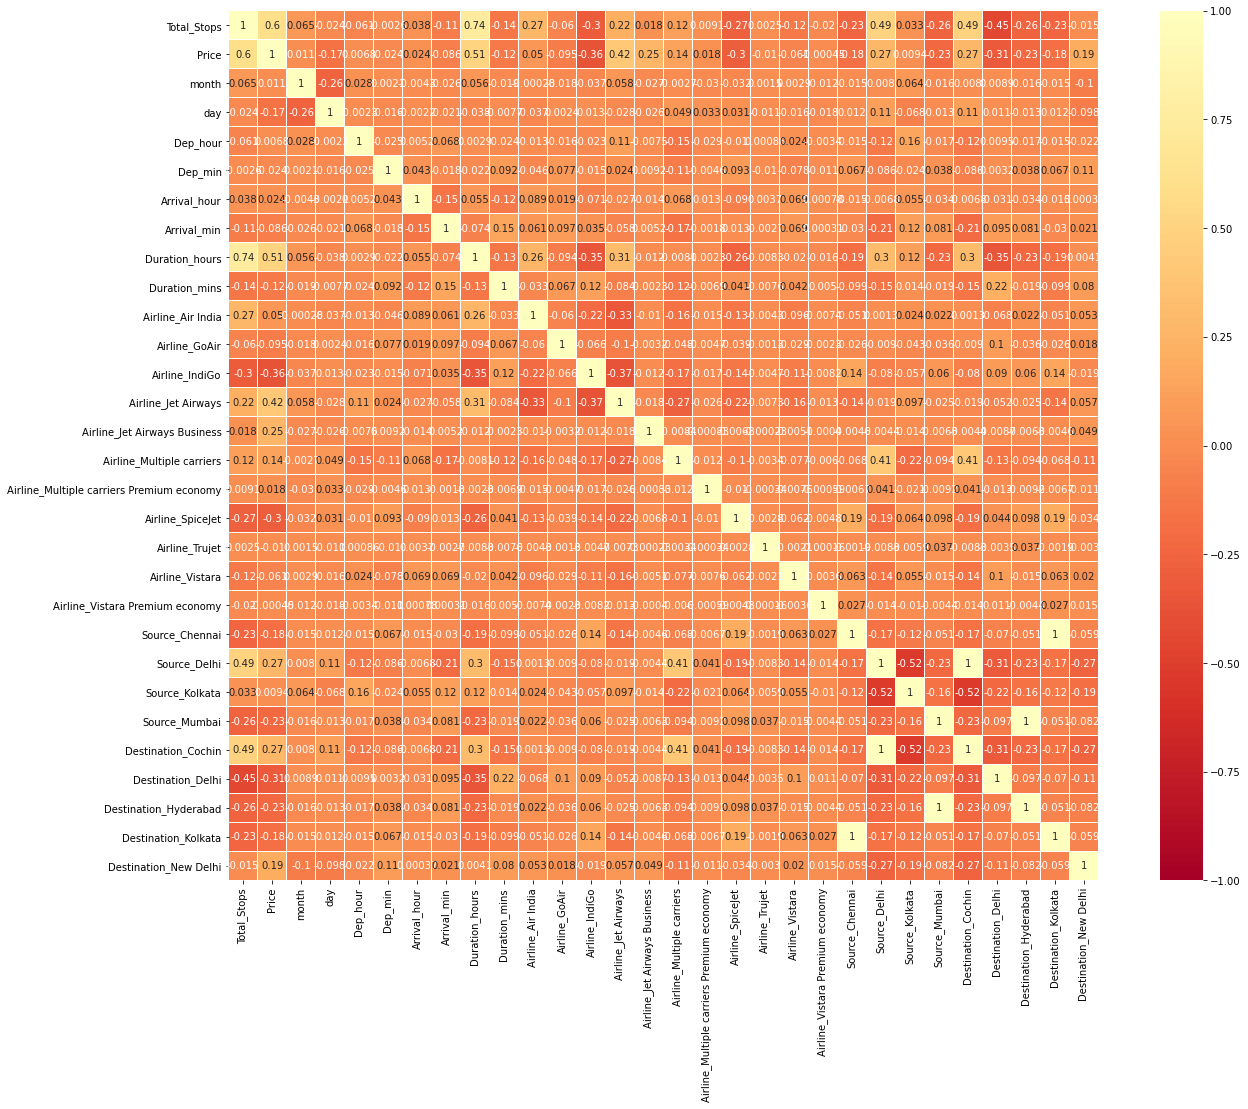

In [392]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

In [394]:
# Dropping the correlated column from train dataset:
train.drop(["Destination_Cochin"],axis=1,inplace=True)


#### Checking Multicolinearity:
Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not in the test dataset.

In [393]:
corr1=test.corr()
corr1.shape

(28, 28)

#### Plotting heatmap (correlation matrix) :

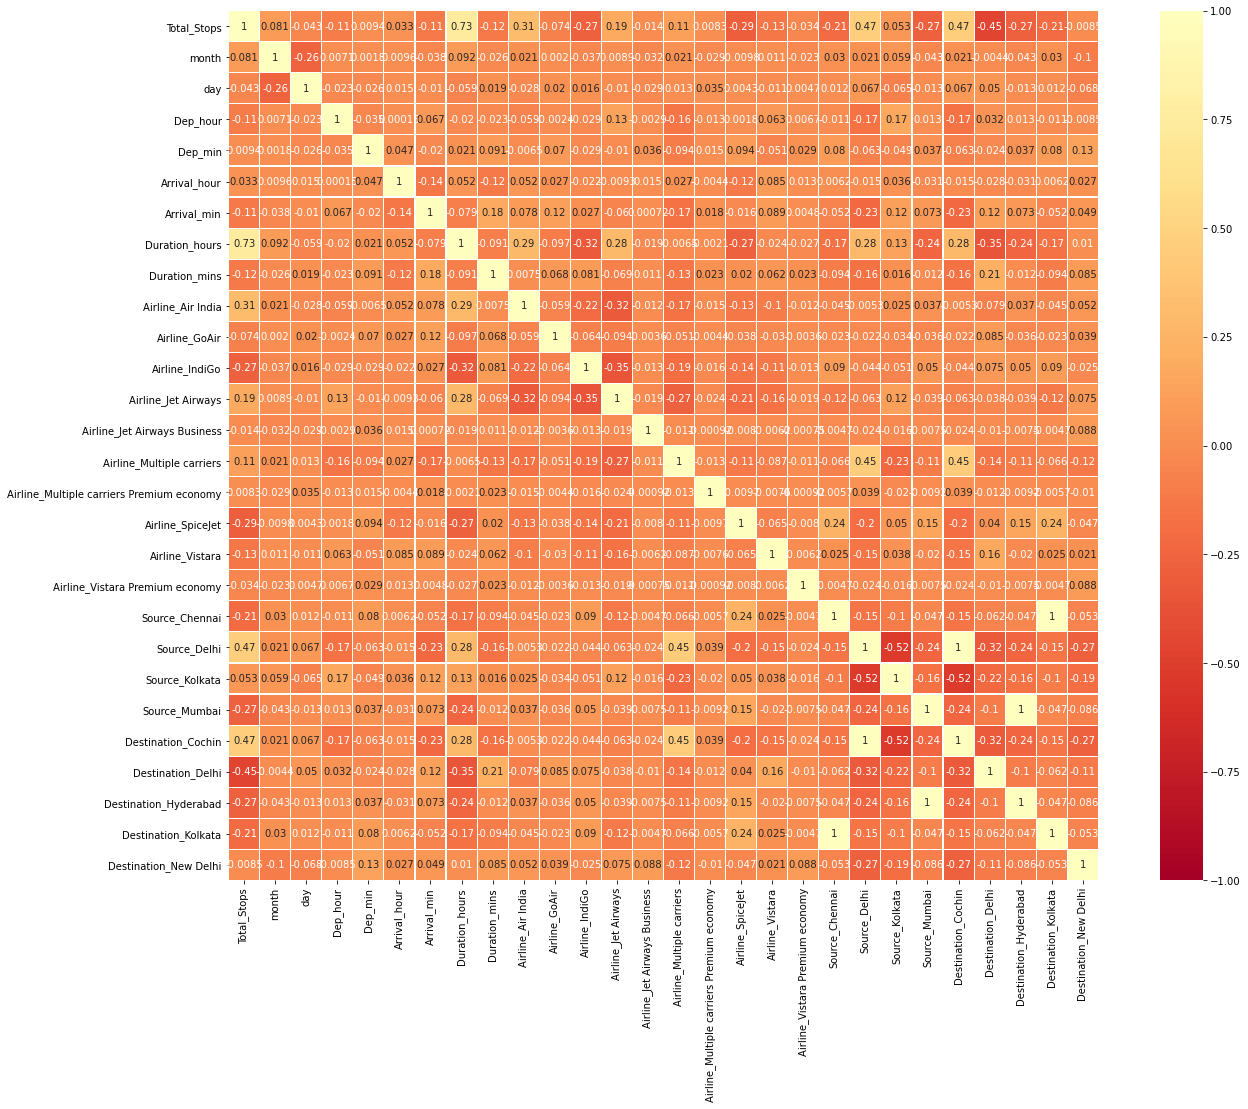

In [214]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr1,cbar=True,cmap='RdYlGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

#### Feature Selection:

We will use SelectKBest feature selection to select the best features that have more influence on the label. Here in this dataset we are using Anova test by using f_classif. f_classif do some Anova test with the features and come up with the scores for every feature. Then comparing each feature score, most important top features are got selected by SelectKBest.

In [395]:
#using SelectKBestfeature selection method selectkbest use f_classif funtion to find best features where f_classif uses ANOVA test
from sklearn.feature_selection import SelectKBest,f_classif

In [396]:
train.head()

,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [397]:
#drop the label from feature
x=train.drop('Price',axis=1)
y=train.Price

In [398]:
#now feature selection
best_features=SelectKBest(score_func=f_classif,k=20)
fit=best_features.fit(x,y)
df_score=pd.DataFrame(fit.scores_)  #.score_ will score the best 17 features in decending order
df_columns=pd.DataFrame(x.columns)

In [399]:
#concatinate the features with scores
feature_scores=pd.concat([df_columns,df_score],axis=1)
feature_scores.columns=['Feature_name','score']  #output column name
print(feature_scores.nlargest(25,'score'))

                                 Feature_name       score
13               Airline_Jet Airways Business         inf
15  Airline_Multiple carriers Premium economy         inf
17                             Airline_Trujet         inf
19            Airline_Vistara Premium economy         inf
18                            Airline_Vistara  346.062470
12                        Airline_Jet Airways  338.230569
21                               Source_Delhi  228.959956
23                              Source_Mumbai  224.438108
25                      Destination_Hyderabad  224.438108
14                  Airline_Multiple carriers  220.660520
0                                 Total_Stops  212.974577
20                             Source_Chennai  212.072625
26                        Destination_Kolkata  212.072625
22                             Source_Kolkata  201.903356
9                           Airline_Air India  157.323048
24                          Destination_Delhi   98.167350
27            

- As we can see, the descending order of important features. Although we are using all the features as the number of features are not more.

#### Standardization:

We have already divided the dataset into features and label, lets standardize now:

In [400]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

###### Hold Out Method:

Models will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.



In [401]:
#building model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

### Model Creation:

Now we are going to build 5 different models. And let's check which one is giving us the best Accuray. Those models are:


1. KNeiborsRegressor
2. RandomForestRegressor
3. GradientBoostingRegressor
4. XGBRegressor
5. DecisionTreeRegressor


#### 1. KNeighbors Regressor:

In [402]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [403]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [404]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.8125074640208791


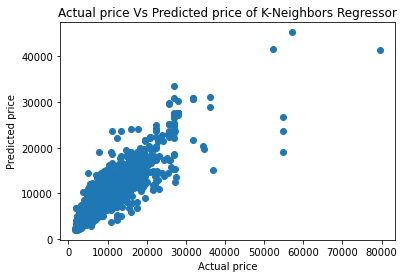

In [405]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of K-Neighbors Regressor')
plt.show()

In [406]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

#### Evaluation of K-Neighbors Regressor:

In [407]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of knn :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.746981661341103
Accuracy of knn : 74.6981661341103


In [408]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1509.5253463122426


In [409]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  5372018.037903408


In [410]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  2317.761428168009


#### Scores of K-Neighbors Regressor:

1.    Accuracy - 0.7465152277089864
2.    MAE of LR - 1509.3353051291651
3.    MSE of LR - 5381921.232661923
4.    RMSE of LR - 2319.896815089396


#### 2. Random Forest Regressor:

In [411]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [412]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [413]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9555228656069439


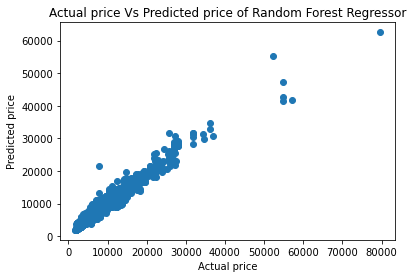

In [414]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [415]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

#### Evaluation of Random Forest Regressor:

In [416]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.7907162862846244
Accuracy of RFR : 79.07162862846245


In [417]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  1222.0017053396602


In [418]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  4443456.118941982


In [419]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  2107.950691771983


#### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.7907162862846244
2.    MAE of RFR :  1222.0017053396602
3.    MSE of RFR : 4443456.118941982
4.    RMSE of RFR : 2107.950691771983

#### 3. Gradient Boosting Regressor:

In [420]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [421]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

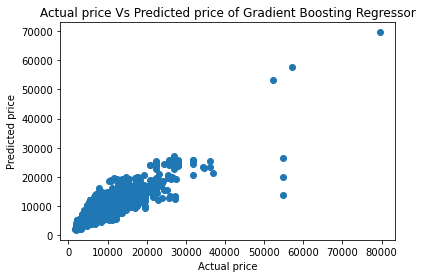

In [422]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Gradient Boosting Regressor')
plt.show()

In [423]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

#### Evaluation of Gradient Boosting Regressor:

In [424]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.7880041090876961
Accuracy of GBR : 78.8004109087696


In [425]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  1477.4649630682395


In [426]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  4501040.343473353


In [427]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  2121.565540697094


#### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.7880041090876961
2.    MAE of GBR : 1474.4867751232616
3.    MSE of GBR : 4403003.185308353
4.    RMSE of GBR :  2098.3334304414902
    
    
#### 4. Decision Tree Regressor:

In [428]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [429]:
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)

In [430]:
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  0.9751753327130905


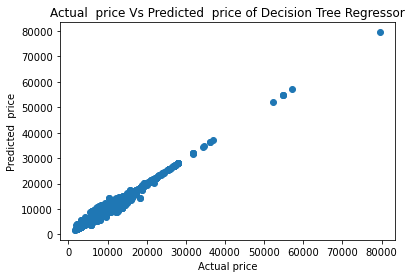

In [431]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted  price')
plt.title('Actual  price Vs Predicted  price of Decision Tree Regressor')
plt.show()

In [432]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)

#### Evaluation of Decision Tree Regressor:

In [433]:
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.6638894242851145
Accuracy of dt : 66.38894242851146


In [434]:
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(y_test,y_test_dt_pred))

mean absolute error of Decision Tree Regressor:  1434.7334955696992


In [435]:
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(y_test,y_test_dt_pred))

mean squared error of Decision Tree Regressor:  7136210.304126004


In [436]:
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_dt_pred)))

Root mean squared error of Decision Tree Regressor:  2671.368620038426


#### Scores of Decision Tree Regressor:

1.    Accuracy of DT : 0.6638894242851145
2.    MAE of DT : 1427.219643079995
3.    MSE of DT : 7136210.304126004
4.    RMSE of DT : 2607.3532429595925


####  5. XGBRegressor:

In [437]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [438]:
#Model Prediction with trained data:
y_xgb_pred = xgb.predict(x_train)

In [439]:
print("R Square Score of xgb:",metrics.r2_score(y_train,y_xgb_pred))

R Square Score of xgb: 0.9405631065475567


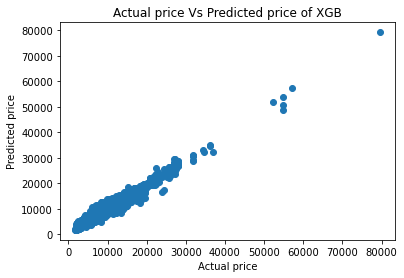

In [440]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_xgb_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of XGB')
plt.show()

In [441]:
# Predicting test data with model:
y_test_xgb_pred = xgb.predict(x_test)

#### Evaluation of XGBRegressor:

In [442]:
xgb_accuracy =metrics.r2_score(y_test,y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.8112326665011447


In [443]:
print ('mean absolute error of XGB: ',mean_absolute_error(y_test,y_test_xgb_pred))

mean absolute error of XGB:  1178.081395853686


In [444]:
print ('mean squared error of  XGB is: ',mean_squared_error(y_test,y_test_xgb_pred))

mean squared error of  XGB is:  4007857.7936197408


In [445]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(y_test,y_test_xgb_pred)))

Root mean squared error of XGB is:  2001.9634845870044


#### Scores of XGB:

1.    Accuracy of XGB :  0.8112326665011447
2.    MAE of XGB : 1178.081395853686
3.    MSE of XGB : 4007857.7936197408
4.    RMSE of XGB : 2001.9634845870044


#### Regulalization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.


#### Regularization using Lasso:

In [273]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [274]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.030928036238528484

In [275]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.030928036238528484)

In [276]:
lasso_reg.score(x_test,y_test)

0.6460115240623657

#### Regularization Using Ridge:

In [278]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [279]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [280]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [281]:
ridge_model.score(x_test,y_test)

0.6460084610576915

 #### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [283]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.69965396 0.69344113 0.71778416 0.72812569 0.64907953]
mean : 69.76168937410922


In [284]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.786419   0.75520814 0.81489995 0.814527   0.76201573]
mean : 78.66139626009792


In [285]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.7628742  0.79326549 0.78035688 0.75971422 0.72212664]
mean : 76.36674857894995


In [298]:
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.52884607 0.64503098 0.65013878 0.71286386 0.69080254]
mean : 64.55364454175412


In [286]:
xgb_cv_score = cross_val_score(xgb,x_train,y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.81246361 0.81751978 0.82168368 0.80948273 0.77744034]
mean : 80.77180254630198


#### Selection of the best model for Flight Ticket Price Prediction:
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.


- KNN = 74.65-69.76 = 4.89, 
- RFR = 78.72-78.66 = 0.06, 
- GBR = 79.26-76.36= 2.93,
- DT = 67.98-64.55 = 3.43,
- XGB = 81.12-80.77 = 0.35,

 ##### Observation:

 Overall the result of all models are good. As most of the Accuracy of the Models are between 74-81%.
As the difference between CV score and accuracy score of XGBRegressor is less and it's got best accuracy of 81%, hence, we are going to tune it's parameter to obtain best result.

#### Hyperparameter Tuning:
Now we will use Grid Search Technique to tune the hyperparameter of XGBRegressor. After getting the best parameters we can put those into the model to obtain the best accuracy.

In [448]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [449]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [450]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.5,n_estimators=200) 
xgbr.fit(x_train,y_train)
y_pred=xgbr.predict(x_test)

In [451]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
84.62558189234461


#### Observation:

After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 84.62%. So, we are going to save XGBoostRegressor Model for Flight ticket price prediction.


Let's check the graph after hyperparameter tuning as well.

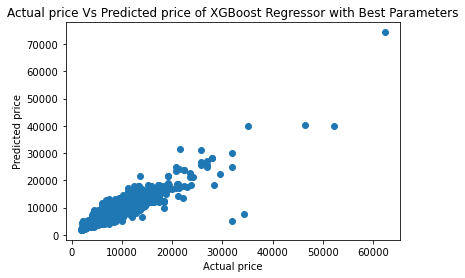

In [452]:
# Checking Actual sales Vs Predicted price using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of XGBoost Regressor with Best Parameters')
plt.show()

### Observation:
After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 84.62%. So, we are going to use XGBoostRegressor Model for predicting price of test dataset.

In [454]:
X_test=test  # reinstantiating test column into a variable 

In [456]:
# Doing the prediction using the test dataset
xgbr.fit(x_train, y_train)
xgbr_pred = xgbr.predict(X_test)
score=xgbr.score(x_train,y_train)
print(score,xgbr,':')

0.9333061721567353 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) :


#### As we can see it is giving almost 93% of accuracy.

In [457]:
#model(test dataset) prediction using gbr
x_predict = list(xgbr.predict(X_test))
df_new = {'predicted_values':x_predict[0:1000],'orignal_values':y_test[0:1000]}
print(pd.DataFrame(df_new))

      predicted_values  orignal_values
1442      10312.782227           14483
3939       6784.791992           13292
2158      10594.483398            3205
2371       7705.642578            7845
6664       6124.673828           10262
...                ...             ...
4624       6124.673828           13555
6057       9181.100586           10262
1768       8187.665527           11789
2495       6124.673828           26890
6094      11669.913086           10197

[1000 rows x 2 columns]


- The prediction by using test dataset has made.

Let's save the model.

In [458]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_flight_pred.obj')

# SAVING THE MODEL

['xgbr_flight_pred.obj']

In [459]:
xgbr_from_joblib=joblib.load('xgbr_flight_pred.obj')
xgbr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([10312.782 ,  6784.792 , 10594.483 , ..., 10312.782 ,  8411.241 ,
        7215.7363], dtype=float32)

#### Conclusion:

Predicting flight fares prove to be tricky as it can be seen from the analysis.
It can be seen that - 
- Flights with more number of stoppages / halts cost more . If is visible that flights with 4 stoppages cost the most.
- JetAirways Business flights are the costliest. 
- Flights originating from Banglore and Delhi and flights to Kochin and New Delhi are the costliest.
- The flight route Delhi-Bombay-Kochin is having the highest frequency of flights proving that this is the busiest route which is going to show high demand
- Frequency of flights hovering for 2h 50m is the highest.
On basis such analysis we have made 5 different models. Out of which XGBRegressor has given the best result of 84% after hyperparameter tuning. 
And lastly we have used the test dataset to predict the price using the best model.